In [1]:
# 작성일자 : 2021-10-08
# 작성자 : 오승엽
# 작성목적 : keras practice

(60000, 28, 28)
60000


In [25]:
# Mnist data set 적재

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

# train_(images,labels)는 모델이 학습해야 할 train set -> 학습용
# Model은 test_(images,labels)로 구성된 test set에서 test될 것 -> 예측용

print(train_images.shape) #학습용 image 
print(len(train_labels))# label의 길이 이를 통해 label과 image가 1:1의 관계인걸 알 수 있음

# image는 numpy배열로 encoding, label은 0~9까지의 숫자배열
# image와 label은 1:1 관계

print(train_labels)
print(test_images.shape)
print(len(test_labels))
print(test_labels)


(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [18]:
import matplotlib.pyplot as plt

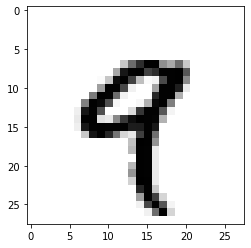

In [26]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary) #image map, 이미지들은 numpy배열로 표현되는데, 이를 통해서 matpltlib로 시각화하여 보여줄 수 있다.
plt.show()

## 작업순서
- 1. 훈련 data set(train_~)을 network에 주입
- 2. network는 image와 label을 연관시킬 수 있도록 학습
- 3. 예측용 data set(test_~)을 이용하여 network에 요청 -> test_labels와 맞는지 확인

In [27]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

neural net의 core는 data 처리를 위한 layer<br>
특정 data -> layer -> 유용한 형태<br>
layer는 주어진 문제에 대해 의미 있는 표현을 입력된 data로부터 추출<br>
DL은 정제 필터(layer)가 연속되어 있는 데이터 processing을 위한 여과기<br>

이 예에서는 연결된 layer 2개가 있다.<br>
(Dense층) 마지막 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1)을 반환하는 softmax 층.<br>
각 점수가 현재 숫자 이미지가 10개의 숫자 class 중 하나에 속할 확률

훈련 준비를 위해 컴파일에 포함될 세 가지
- 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
- 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
- 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

In [28]:
network.compile(optimizer='rmsprop',
               loss='categorial_crossentropy',
               metrics=['accuracy'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0~1 사이로 스케일을 조정. <br>

ex, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다.<br> 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다.

In [29]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Label range로  encoding 

In [32]:
from keras.utils.np_utils import to_categorical
# from keras.utils import to_categorical -> 변경

In [33]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

신경망 훈련 준비 완료. 
케라스에서는 fit method를 통해 훈련 data 모델을 학습시